<h1 align='center' style='color:Blue'>Clustering With K Means - Python </h1>

In [61]:
# Library files that are imported into the program
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [78]:
# This Data is avalable on Kaggle i have uploaded it as basic-income by rohan please find it there.
df = pd.read_csv("../input/basic-income/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


We have to perfrom EDA before model building this is a small data so therefore i have varified it.
This data here has no errors as it is ready for model building.

Text(0, 0.5, 'Income($)')

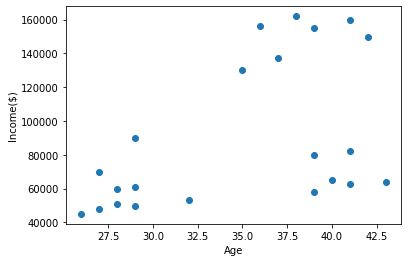

In [79]:
# Scatter shows us the distribution in 2 variables on one graph so it becomes easy to visualize and understand
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

Here in the above scatter plt we can observe that we can seprate the dta into 3 categories , that is for me, it migh be different for each other. 


In [80]:
km = KMeans(n_clusters=3) # here we have gives k=3 that means for 3 clusters.
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [81]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [82]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

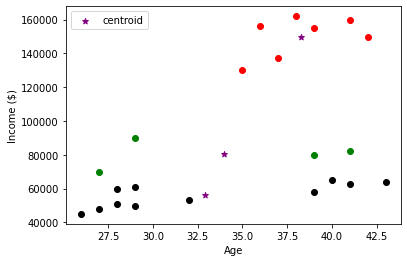

In [83]:
#Visualizing the Data Points with Different colour for each cluster and star as Centroid(purple).
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In the above graph we can obseve that the data is not preoperly shown or distributed and it is not haveing the proper scale.

## Preprocessing using min max scaler
Normalization or Standardization anyting can give us the proper order or distribution.

In [84]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

Here we have normalized all the data of Age and Income.

In [85]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


We can obseve the scale or values all of them are in 0. values because they come under 0-1 scale or within it.

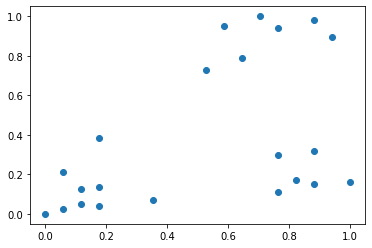

In [86]:
plt.scatter(df.Age,df['Income($)'])
# this plot shows the similar scatter plot that we plotted for the first time but only thing that changes is the Scale values.

In [87]:
# Now performing kmeans again  
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [88]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [89]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

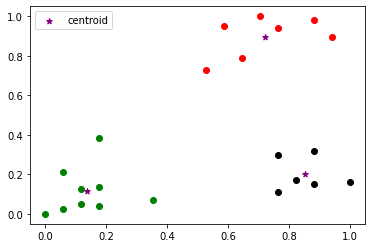

In [90]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Here we can clearly see that the order has been displayed properly , the centroin in at the center of each clusters , the 3 clusters are grouped at one place with centroid( star in at the center ).

Elbow Plot
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [91]:
sse = []  # empty list to store the values that are going to be plotted.
k_rng = range(1,10) # we can give the range as per our guess or requirements
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

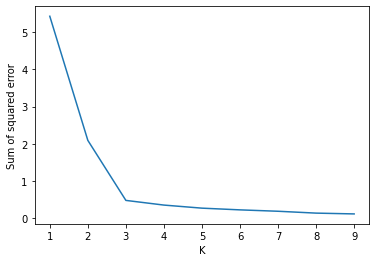

In [92]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Here in the elbow plot we can see that there are huge change from 1 to 3 then stops the drift that means that there are mainly 3 clusters that we have to consider or we can also take 4 clusters.

Thank you!